## Analyze A/B Test Results
### By: Isra Bazzar 
#### For Udacity Data Analysis Nanodegree Program


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")

b. Use the below cell to find the number of rows in the dataset.

In [3]:
print("(Rows, Columns):" , df.shape)

(Rows, Columns): (294478, 5)


c. The number of unique users in the dataset.

In [4]:
print("# Of unique Users: ", df.user_id.nunique())

# Of unique Users:  290584


d. The proportion of users converted.

In [5]:
#Print first few rows of the data frame to have a glimps about data and columns
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [6]:
# Proportion of converted 
print("Proportion of converted = ", df.converted.mean())

Proportion of converted =  0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
# Find number of rows for treatment group
#df_treatment = df[df["group"] == "treatment"]
#df_treatment.shape

# Find number of rows for treatment group
#df_control = df[df["group"] == "control"]
#df_control.shape

# New datframe for group = treatment and page = old
df_treatment_old = df.query("group == 'treatment' & landing_page == 'old_page'")
df_treatment_old.shape

#New dataframe for group = control and page = new
df_control_new = df.query("group == 'control' & landing_page == 'new_page'")
df_control_new.shape

# Number of rows where treatment and new_page don't line up
print("# times new_page and treatment Dont line up: ", df_treatment_old.shape[0] + df_control_new.shape[0])

# times new_page and treatment Dont line up:  3893


f. Do any of the rows have missing values?

In [8]:
#Print information about data frame (including # of non-null values for each column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


As shown above all columns have the same number of non-null values as the total number of rows, means **no missing values**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page, we should only use the rows that we can feel confident in the accuracy of the data, So the right action for these rows is to drop


a.Drop rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**. Store your new dataframe in **df2**.

In [9]:
df2 = df.query("(group == 'treatment' & landing_page == 'new_page')|(group == 'control' & landing_page == 'old_page')")

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` **Updated DataFrame**: Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# Number of unique user_ids
print("# unique user_ids: ", df2['user_id'].nunique())

# unique user_ids:  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# Find duplicated user id with row index
df2[df2["user_id"].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
#Duplicated user row information
df2[df2["user_id"].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop_duplicates(subset = "user_id")
print(df2.shape)

(290584, 5)


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.head()
#Proportion of users converting
convert_proportion = df2["converted"].mean()
print("Converted propability = ", convert_proportion)

Converted propability =  0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
act_p_old = df2[df2["group"]=="control"]["converted"].mean()
act_p_old

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
act_p_new = df2[df2["group"]=="treatment"]["converted"].mean()
act_p_new

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
new_page_count = df2[df2["landing_page"]=="new_page"]["user_id"].count()
all_count = df2["user_id"].count()

new_page_probability = new_page_count/all_count
print("probability that an individual received the new page = ", new_page_probability)

probability that an individual received the new page =  0.5000619442226688


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

> **ِConclusion**: Mean for peaople converted within treatment group (0.1204)is almost the same as proportion for control group(0.1188), So; I assume that the treatment doesn't affect number of conversations but to prove this we need to do hypothesis test and find p-value. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

NULL Hypothesis: Convert Rate didn't change (same or better)
>  **$H_{0}$** : **$p_{new}$** - **$p_{old}$** <= 0
>> **$P_{diff}$** <= 0

<br/> Alternative hypotheses: Convert rate for new page is better 
>  **$H_{1}$** : **$p_{new}$** - **$p_{old}$** > 0
>> **$P_{diff}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. Calculate **convert rate** for $p_{new}$ and $p_{old}$ under the null? 

In [19]:
# As assumed above:  p_old = p_new = converted rate in ab_data.csv regardless of the page
convert_rate = p_new = p_old = df2.converted.mean()
convert_rate

0.11959708724499628

c. What is $n_{new}$?

In [20]:
# Find rows count for landing_page = new_page
n_new = df2[df2["landing_page"] == "new_page"]["user_id"].count()
n_new

145310

d. What is $n_{old}$?

In [21]:
# Find rows count for landing_page = old_page
n_old = df2[df2["landing_page"] == "old_page"]["user_id"].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#Use numpy binomial function to simulate n_new transactions with 1's and 0's
#with size = n_new and p parameter = p_new 
new_page_converted = np.random.binomial(1, p=p_new, size=n_new)
new_page_converted.mean()

0.12097584474571606

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
##Use numpy binomial function to simulate n_old transactions with 1's and 0's
#with n size = n_old and p parameter = p_old 
old_page_converted = np.random.binomial(1, p=p_old, size=n_old)
old_page_converted.mean()

0.12066164626843069

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

0.00031419847728536565

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [25]:
p_diffs = []
for _ in range(10000):
    old_page_converted = np.random.binomial(1, p=p_old, size=n_old)
    new_page_converted = np.random.binomial(1, p=p_new, size=n_new)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5, 1.0, 'Histogram For simulated p_diffs')

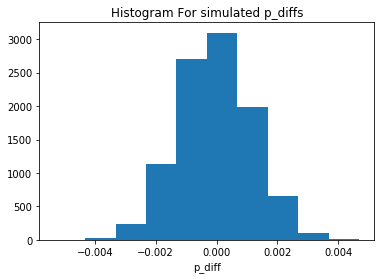

In [26]:
plt.hist(p_diffs);
plt.xlabel("p_diff")
plt.title("Histogram For simulated p_diffs")

In [27]:
np.mean(p_diffs)

-2.9960494624058042e-05

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# Find the actual difference from ab_data.csv
act_p_diff = act_p_new - act_p_old
act_p_diff

-0.0015782389853555567

In [29]:
# Find proportion of the p_diffs are greater than the actual difference 
#observed in ab_data.csv

# Array for comparison btw p_diffs from simulation with actual p_diff
p_diffs = np.array(p_diffs)
act_sim_diff = p_diffs > act_p_diff
act_sim_diff.mean()

0.9019

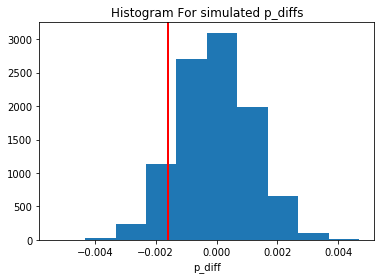

In [30]:
#Plot histogram with line for marking actual difference 
plt.hist(p_diffs);
plt.xlabel("p_diff")
plt.title("Histogram For simulated p_diffs")
plt.axvline(act_p_diff,c='R',linewidth = 2);

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

>In part J we calculated the proportion for simulated p_diff > actual diff, this value called **P-value** = 0.91, and since it's a large p-value it suggests that we shouldn't move from the Null,i.e. suggests Null is true ,, $P_{diff}$ <= 0


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df.query("(landing_page == 'old_page')")['converted'].sum()
convert_new = df.query("(landing_page == 'new_page')")['converted'].sum()

# n_old and n_new are already defined above 
convert_old, convert_new, n_new, n_old

(17739, 17498, 145310, 145274)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new,n_old], alternative='larger')
z_score, p_value


(-1.394390551291367, 0.9184001500898661)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

>P- Value here is the same as obtained from part j, which fails to reject the Null hypothesis, since it provides an evidence for a higher probability for Null hypothesis

#### Z-Value Analysis
>Our Z-Value = -1.39

>Now we will find the z-value for our critical region from [z-table](http://www.z-table.com/), since alpha = 0.05, (The shaded area on the left to critical z-value = 0.05) <br/>

>**Critical z-value = -1.65** which is less than our z-value above, which also fails to provide us with an evidence to reject Null Hypothesis



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We should use **Logistic Regression**, since the predicted variable(convert) can has only two values

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
# Create new column for intercept
df2['intercept'] = 1

# Create dummies for landing_page column 
df2['ab_page'] = pd.get_dummies(df2['landing_page'])['new_page']
#Print count for each value to check dummies 
df2.groupby('ab_page')['user_id'].count()

ab_page
0    145274
1    145310
Name: user_id, dtype: int64

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 01 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        05:26:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [36]:
# Find the exponential for results, since it's a logistic Model
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

P-value for ab_page = 0.190, it differs from the value found in Part2: AB test above because of the difference in null and alternative in part 2 we stated H0 as Pdiff <= 0, so the test was one sided, but in this model they assume that H0: Pdiff = 0, so the test done here as 2-sided

**But Anyway, P-value = 0.19 > a= 0.05, So again it fails to reject the Null hypotheses**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> Including more explanatory variables in our test will lead us to more accurate(closer to reality) decisions(if the variables are really statistically significant), including more factors would increase R-square value.
<br/>Something to consider: explanatory(independent)variables should be independent of each other, to minimize multicollinearity between variables. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [37]:
#Read countries data 
countries_data = pd.read_csv('countries.csv')
countries_data.head()

# Add country column to our data frame df2 using pd.join method
df2 = df2.join(countries_data.set_index('user_id'), on='user_id')
# Print country unique values 
df2['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [38]:
#Create dummies for country(categorial explanatory variable)
df2[['US', 'CA', 'UK']] = pd.get_dummies(df2['country'])

#We need two columns for the three dummy varaibles.if set US as baseline country, we can drop it 
df2 = df2.drop('US', axis=1)

log_mod = sm.Logit(df2['converted'], df2[['intercept', 'CA', 'UK']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 Jul 2019   Pseudo R-squ.:               1.521e-05
Time:                        05:26:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
CA             0.0507      0.028      1.786      0.074      -0.005       0.106
UK             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

#### Conclusion

>P-value for CA 0.075 and for UK 0.129 are both more than our alpha threshold 0.05, And again fail to reject Null

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.  


In [39]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'UK']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 Jul 2019   Pseudo R-squ.:               2.323e-05
Time:                        05:26:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA             0.0506      0.028      1.784      0.074      -0.005       0.106
UK             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

#### Conclusion
> Note that R-squared has been increased, and p-values for all variables are more than the alpha threshold, Results in failure to reject Null here also 

<a id='conclusions'></a>
## Conclusions

> Based on all tests and regressions done above, the company shouldn't change to the new page, since all tests failed to reject the null hypothesis which assumed that the old page is the same or better than the new one.


In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0